# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [307]:
import numpy as np
import pandas as pd

In [308]:
df = pd.read_csv("rym_top5000.csv")

In [309]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [310]:
artists = df['Artist Name'].value_counts().to_frame('count')
artists['Artist Name'] = artists.index
artists = artists.query('count>5')
myDf = pd.merge(df, artists,
            how = 'inner',
            on = 'Artist Name') 
myDf.groupby(by = 'Artist Name').agg('Average Rating').median().sort_values(ascending=False).head(10)


Artist Name
David Bowie           4.050
The Beatles           4.045
King Crimson          3.970
The Rolling Stones    3.965
Black Sabbath         3.950
Led Zeppelin          3.940
Pink Floyd            3.910
Death                 3.905
John Coltrane         3.905
Bob Dylan             3.890
Name: Average Rating, dtype: float64

#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [311]:
myDf = df.groupby(by = 'Artist Name')['Average Rating'].describe()
myDf['roznica'] = myDf['max'] - myDf['min']
myDf.sort_values('roznica', ascending=False)[['min','max']].head(10)

,min,max
Artist Name,,
Kendrick Lamar,3.52,4.27
The Beatles,3.55,4.25
Pink Floyd,3.60,4.29
My Bloody Valentine,3.58,4.24
King Crimson,3.67,4.30
John Coltrane,3.70,4.30
Radiohead,3.66,4.23
Miles Davis,3.69,4.23
The Cure,3.63,4.17


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [312]:
df['Number of Ratings repaired'] = df['Number of Ratings'].str.replace(',', '').astype(int)
df
myDf = df.query('`Number of Ratings repaired` >= 5000 and `Number of Reviews` >= 15' )
myDf['iloraz'] = myDf['Number of Ratings repaired'] / myDf['Number of Reviews']
myDf.sort_values('iloraz', ascending = False)['Album'].head(10)

C:\Users\lukas\AppData\Local\Temp\ipykernel_10296\592847723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf['iloraz'] = myDf['Number of Ratings repaired'] / myDf['Number of Reviews']


353     Jenny Death: The Powers That B Disc 2
1695                 Bury Me at Makeout Creek
3733                     春と修羅 (Haru to Shura)
4949                               Saturation
1036                           Saturation III
2489                                  Scenery
643                                   Endless
2869                                 Imperial
950                             Saturation II
439                            Bottomless Pit
Name: Album, dtype: object

#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [315]:
df['year'] = pd.DatetimeIndex(df['Release Date']).year
print(df[['Number of Reviews','Number of Ratings repaired']].describe())
#82.250000	4719.250000
#mean 4084.510600
#recenzje
print(df.query('`Number of Reviews` > 82.25').groupby(by = 'year')['year'].count().sort_values(ascending = False).head(5))
#oceny
myDF = df.query('`Number of Ratings repaired` > 4719.25').groupby(by = 'year')['Artist Name'].count().sort_values(ascending = False).to_frame()
myDF = myDF.reset_index()


       Number of Reviews  Number of Ratings repaired
count        5000.000000                 5000.000000
mean           71.449200                 4084.510600
std           108.473786                 6001.340235
min             0.000000                  260.000000
25%            14.000000                  752.750000
50%            34.000000                 1820.000000
75%            82.250000                 4719.250000
max          1549.000000                70382.000000
year
1970    43
1971    41
1969    38
1994    36
1995    34
Name: year, dtype: int64


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [316]:
import matplotlib.pyplot as plt

In [317]:
myDF2 = df.groupby(by = 'year')['Number of Ratings repaired'].mean().to_frame().reset_index()
myDF3 = pd.merge(df, myDF2,
             how = 'outer',
                on = 'year')
myDF3 = myDF3.query('`Number of Ratings repaired_x` > `Number of Ratings repaired_y`').groupby(by = 'year')['Album'].count().sort_values(ascending = False).to_frame().reset_index()

In [318]:
myDF = pd.merge(myDF, myDF3,
             how = 'inner',
            on = 'year')
myDF

,year,Artist Name,Album
0,1994,41,41
1,1971,36,40
2,1970,35,40
3,1996,34,37
4,1995,33,37
...,...,...,...
60,1960,3,5
61,1963,2,7
62,1961,2,9
63,1958,2,8


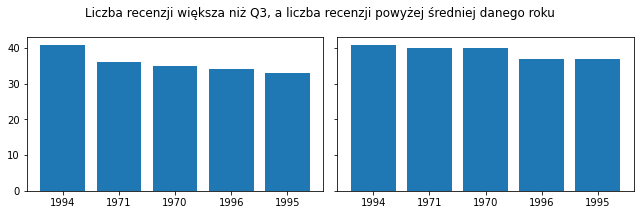

In [334]:
myDF = myDF.sort_values('Artist Name', ascending = False).head(5)
myDF['year'] = myDF['year'].astype(str)
fig, ax = plt.subplots(1,2,figsize=(9, 3), sharey=True)

ax[0].bar(myDF['year'], myDF['Artist Name'],  label = 'Q3')
ax[1].bar(myDF['year'], myDF['Album'], label = 'Powyżej średniej')

fig.suptitle('Liczba recenzji większa niż Q3, a liczba recenzji powyżej średniej danego roku')

fig.tight_layout()

plt.show()

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 